# Todo list:
- Figure out a way to determine the MIN_DISTANCE dynamically
    - Look that the TARGET_S is covered for at least 80% or so with datapoints? (with a max for when there are no matches)
- Find the best way to plot (for ourselves) the comparison 
- Make the code for the data cleanup nice
- Make some more example edits and document the edits
- Investigate logo removal options?
- GOAL: Provide clear decision

# Ordered TODO list:
1. Make some more example edits and document the edits



In [1]:
from app import *

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.ipify.org:443
DEBUG:urllib3.connectionpool:https://api.ipify.org:443 "GET / HTTP/1.1" 200 14
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.gradio.app:443
DEBUG:urllib3.connectionpool:https://api.gradio.app:443 "POST /gradio-initiated-analytics/ HTTP/1.1" 200 31
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.gradio.app:443
DEBUG:urllib3.connectionpool:https://api.gradio.app:443 "POST /gradio-initiated-analytics/ HTTP/1.1" 200 31
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.gradio.app:443
DEBUG:urllib3.connectionpool:https://api.gradio.app:443 "GET /pkg-version HTTP/1.1" 200 20
DEBUG:asyncio:Using selector: KqueueSelector
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.ipify.org:443


Using cache from '/Users/ijanssen/videomatch/gradio_cached_examples/15' directory. If method or examples have changed since last caching, delete this folder to clear cache.


DEBUG:urllib3.connectionpool:https://api.ipify.org:443 "GET / HTTP/1.1" 200 14
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.gradio.app:443
DEBUG:urllib3.connectionpool:https://api.gradio.app:443 "POST /gradio-initiated-analytics/ HTTP/1.1" 200 31
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.gradio.app:443
DEBUG:urllib3.connectionpool:https://api.gradio.app:443 "POST /gradio-initiated-analytics/ HTTP/1.1" 200 31
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.gradio.app:443
DEBUG:urllib3.connectionpool:https://api.gradio.app:443 "GET /pkg-version HTTP/1.1" 200 20
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.ipify.org:443
DEBUG:urllib3.connectionpool:https://api.ipify.org:443 "GET / HTTP/1.1" 200 14
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.gradio.app:443
DEBUG:urllib3.connectionpool:https://api.gradio.app:443 "POST /gradio-initiated-analytics/ HTTP/1.1" 200 31


INFO:root:Skipping downloading from https://www.dropbox.com/s/8c89a9aba0w8gjg/Ploumen.mp4?dl=1 because /var/folders/hy/qkxzx5jj0hvcj_l_lpvn81sc0000gp/T/75ae859c16eff3f4d876a8aa4a06533c already exists.
INFO:root:Loading indexed hashes from /var/folders/hy/qkxzx5jj0hvcj_l_lpvn81sc0000gp/T/75ae859c16eff3f4d876a8aa4a06533c.index
INFO:root:Index /var/folders/hy/qkxzx5jj0hvcj_l_lpvn81sc0000gp/T/75ae859c16eff3f4d876a8aa4a06533c.index has in total 751 frames
INFO:root:Skipping downloading from https://www.dropbox.com/s/4ognq8lshcujk43/Plenaire_zaal_20200923132426_Omtzigt.mp4?dl=1 because /var/folders/hy/qkxzx5jj0hvcj_l_lpvn81sc0000gp/T/95fc56d68e602bc591942581d1c98114 already exists.
INFO:root:Loading indexed hashes from /var/folders/hy/qkxzx5jj0hvcj_l_lpvn81sc0000gp/T/95fc56d68e602bc591942581d1c98114.index
INFO:root:Index /var/folders/hy/qkxzx5jj0hvcj_l_lpvn81sc0000gp/T/95fc56d68e602bc591942581d1c98114.index has in total 7471 frames
DEBUG:matplotlib.pyplot:Loaded backend module://matplotlib_i

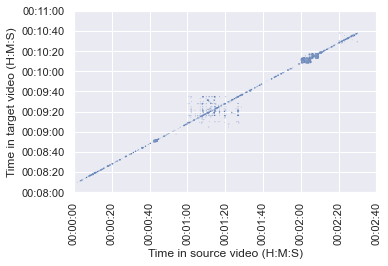

In [2]:
target = video_urls[-1:] # (Plenaire Zaal) Long video

url = video_urls[0] # (0: Ploumen) (1: Bram) (2: Baudet) Short video which is a (maybe mixed up) subset of the soure video
# url = move_video_to_tempdir("videos", "removed_part.mp4") # Set is_file to TRUE if using a file instead of a url

x = compare_videos(url, target[0], MIN_DISTANCE=3)

# From here on out code experimentation

In [65]:
MIN_DISTANCE = 4 # Distance always increases by 2: 0, 2, 4 .. 

# Url (short video) 
url = move_video_to_tempdir("videos", "Ploumen_CO_5.0s_to_10.0_at_15.0.mp4")
# url = video_urls[1] # (0: Ploumen) (1: Bram) (2: Baudet) Short video which is a (maybe mixed up) subset of the soure video

if url.endswith('dl=1'):
    IS_FILE = False
elif url.endswith('.mp4'):
    IS_FILE = True

video_index = index_hashes_for_video(url, is_file = IS_FILE)
video_index.make_direct_map() # Make sure the index is indexable
hash_vectors = np.array([video_index.reconstruct(i) for i in range(video_index.ntotal)]) # Retrieve original indices

# Target video (long video)
target_indices = [index_hashes_for_video(x) for x in [target][0]]

# The results are returned as a triplet of 1D arrays 
# lims, D, I, where result for query i is in I[lims[i]:lims[i+1]] 
# (indices of neighbors), D[lims[i]:lims[i+1]] (distances).
lims, D, I = target_indices[0].range_search(hash_vectors, MIN_DISTANCE)

INFO:root:Skipping copying from videos/Ploumen_CO_5.0s_to_10.0_at_15.0.mp4 because /var/folders/hy/qkxzx5jj0hvcj_l_lpvn81sc0000gp/T/Ploumen_CO_5.0s_to_10.0_at_15.0.mp4 already exists.
INFO:root:Loading indexed hashes from /var/folders/hy/qkxzx5jj0hvcj_l_lpvn81sc0000gp/T/Ploumen_CO_5.0s_to_10.0_at_15.0.mp4.index
INFO:root:Index /var/folders/hy/qkxzx5jj0hvcj_l_lpvn81sc0000gp/T/Ploumen_CO_5.0s_to_10.0_at_15.0.mp4.index has in total 751 frames


AttributeError: 'list' object has no attribute 'encode'

  kws["alpha"] = 1 if self.alpha == "auto" else self.alpha



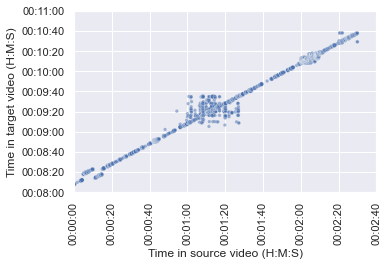

In [66]:
def plot_comparison(lims, D, I, hash_vectors, MIN_DISTANCE = 3):
    sns.set_theme()

    x = [(lims[i+1]-lims[i]) * [i] for i in range(hash_vectors.shape[0])]
    x = [i/FPS for j in x for i in j]
    y = [i/FPS for i in I]
    
    # Create figure and dataframe to plot with sns
    fig = plt.figure()
    # plt.tight_layout()
    df = pd.DataFrame(zip(x, y), columns = ['X', 'Y'])
    g = sns.scatterplot(data=df, x='X', y='Y', s=20*(1-(D/(MIN_DISTANCE+1))), alpha=1-D/MIN_DISTANCE)

    # Set x-labels to be more readable
    x_locs, x_labels = plt.xticks() # Get original locations and labels for x ticks
    x_labels = [time.strftime('%H:%M:%S', time.gmtime(x)) for x in x_locs]
    plt.xticks(x_locs, x_labels)
    plt.xticks(rotation=90)
    plt.xlabel('Time in source video (H:M:S)')
    plt.xlim(0, None)

    # Set y-labels to be more readable
    y_locs, y_labels = plt.yticks() # Get original locations and labels for x ticks
    y_labels = [time.strftime('%H:%M:%S', time.gmtime(y)) for y in y_locs]
    plt.yticks(y_locs, y_labels)
    plt.ylabel('Time in target video (H:M:S)')

    # Adjust padding to fit gradio
    plt.subplots_adjust(bottom=0.25, left=0.20)
    return fig 

_ = plot_comparison(lims, D, I, hash_vectors, MIN_DISTANCE = MIN_DISTANCE)

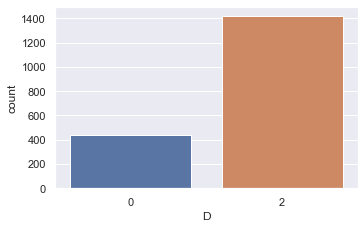

In [67]:
def plot_distances(D, MIN_DISTANCE = 3):
    sns.set_theme()

    # Create figure and dataframe to plot with sns
    fig = plt.figure()
    df = pd.DataFrame(D, columns = ['D'])
    df['D'] = df['D'].astype(int)
    
    # Countplot
    g = sns.countplot(data = df, x = 'D')
    # g = sns.barplot(x = np.arange(0, MIN_DISTANCE, step = 2), y = df['D'].value_counts())
    # g = sns.histplot(data=df, x='D', binwidth=1)
    
    # Proportion
    # g = sns.ecdfplot(data=df, x='D', complementary=False)
    # plt.xlim(0, MIN_DISTANCE)
    
    plt.subplots_adjust(bottom=0.25, left=0.20)
    return fig 

_ = plot_distances(D, MIN_DISTANCE = MIN_DISTANCE)

In [68]:

target = [(lims[i+1]-lims[i]) * [i] for i in range(hash_vectors.shape[0])]
target_s = [i/FPS for j in target for i in j]
source_s = [i/FPS for i in I]

# Make df
df = pd.DataFrame(zip(target_s, source_s), columns = ['TARGET_S', 'SOURCE_S'])
df['TARGET_WEIGHT'] = 1 - D/MIN_DISTANCE # Higher value means a better match

# Multiply the weight (which indicates a better match) with the value for Y
# and aggregate to get a less noisy estimate of Y
df['SOURCE_WEIGHTED_VALUE'] = df['SOURCE_S'] * df['TARGET_WEIGHT'] 

# Group by X so for every second/x there will be 1 value of Y in the end
grouped_X = df.groupby('TARGET_S').agg({'SOURCE_WEIGHTED_VALUE' : 'sum', 'TARGET_WEIGHT' : 'sum'})
grouped_X['FINAL_SOURCE_VALUE'] = grouped_X['SOURCE_WEIGHTED_VALUE'] / grouped_X['TARGET_WEIGHT'] 

# Remake the dataframe
df_cleaned = grouped_X.reset_index()
df_cleaned = df_cleaned.drop(columns=['SOURCE_WEIGHTED_VALUE', 'TARGET_WEIGHT'])
df_cleaned = df_cleaned.rename({'FINAL_SOURCE_VALUE' : 'SOURCE_S'}, axis='columns')
df = df_cleaned
df

,TARGET_S,SOURCE_S
0,0.0,487.800000
1,0.2,488.000000
2,1.8,489.800000
3,3.6,491.400000
4,4.0,492.000000
...,...,...
424,149.2,637.200000
425,149.4,637.266667
426,149.6,637.300000
427,149.8,633.500000


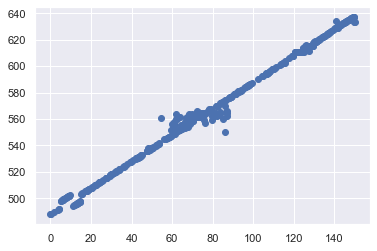

In [69]:
plt.scatter(x=df['TARGET_S'], y = df['SOURCE_S'])

# Try CUSUMDetector from KATS 101 on the 'averaged' data

In [70]:
# import packages
from kats.detectors.cusum_detection import CUSUMDetector
from kats.consts import TimeSeriesData

df

,TARGET_S,SOURCE_S
0,0.0,487.800000
1,0.2,488.000000
2,1.8,489.800000
3,3.6,491.400000
4,4.0,492.000000
...,...,...
424,149.2,637.200000
425,149.4,637.266667
426,149.6,637.300000
427,149.8,633.500000


DEBUG:root:Detecting increase changepoint.
DEBUG:root:Detecting decrease changepoint.
INFO:root:Max iteration reached and no stable changepoint found.


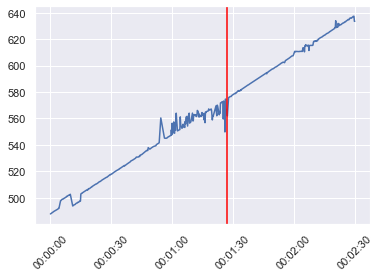

In [71]:
df['time'] = pd.to_datetime(df["TARGET_S"], unit='s') # Needs a datetime as input

tsd = TimeSeriesData(df.loc[:,['time','SOURCE_S']])
detector = CUSUMDetector(tsd)
change_points = detector.detector() # Both directions are allowed

detector.plot(change_points)
plt.xticks(rotation=45)
plt.show()

In [72]:
change_points

[CUSUMChangePoint(start_time: 1970-01-01 00:01:27.200000, end_time: 1970-01-01 00:01:27.200000, confidence: 1.0, direction: increase, index: 242, delta: 74.2245742406136, regression_detected: True, stable_changepoint: True, mu0: 536.2953569156037, mu1: 610.5199311562174, llr: 551.1893035744112, llr_int: inf, p_value: 0.0, p_value_int: nan)]

# Try KATS outlier detection :D

In [73]:
tsd

,time,SOURCE_S
0,1970-01-01 00:00:00.000,487.800000
1,1970-01-01 00:00:00.200,488.000000
2,1970-01-01 00:00:01.800,489.800000
3,1970-01-01 00:00:03.600,491.400000
4,1970-01-01 00:00:04.000,492.000000
...,...,...
424,1970-01-01 00:02:29.200,637.200000
425,1970-01-01 00:02:29.400,637.266667
426,1970-01-01 00:02:29.600,637.300000
427,1970-01-01 00:02:29.800,633.500000


In [74]:
from kats.detectors.outlier import OutlierDetector

outlier_ts = OutlierDetector(tsd, 'additive') # call OutlierDetector
outlier_ts.detector() # apply OutlierDetector

INFO:root:Setting frequency to Daily since it cannot be inferred
ERROR:root:!! Traceback (most recent call last):
!!   File "/usr/local/lib/python3.9/site-packages/kats/detectors/outlier.py", line 134, in detector
    outliers_index, output_scores, time_index = self.__clean_ts__(ts)
!!   File "/usr/local/lib/python3.9/site-packages/kats/detectors/outlier.py", line 95, in __clean_ts__
    result = seasonal_decompose(
!!   File "/usr/local/lib/python3.9/site-packages/pandas/util/_decorators.py", line 207, in wrapper
    return func(*args, **kwargs)
!!   File "/usr/local/lib/python3.9/site-packages/statsmodels/tsa/seasonal.py", line 143, in seasonal_decompose
    raise ValueError("You must specify a period or x must be a "
!! ValueError: You must specify a period or x must be a pandas object with a DatetimeIndex with a freq not set to None

ERROR:root:Outlier Detection Failed


# Missing Values (and how to deal with them)

In [78]:
if 'time' in df.columns:
    df = df.drop(columns='time')

# 1. Identify missing x values (0.0, 0.2, 1.8 as detected, so 0.4 to 1.6 is missing)
median_x_increase = np.median(df['TARGET_S'][1:] - df['TARGET_S'].shift(1)[1:])
median_y_increase = np.median(df['SOURCE_S'][1:] - df['SOURCE_S'].shift(1)[1:])
print(median_x_increase, median_y_increase) # 1/FPS
rounded_x_inc = np.round(median_x_increase, 3)

# Add NAN to "missing" x values
# base it off hash vecotr, not target s
step_size = 1/FPS
x_complete =  np.round(np.arange(start=0.0, stop = max(df['TARGET_S'])+step_size, step = step_size), 1)
# x_complete = np.linspace(start = min(df['TARGET_S']), stop = max(df['TARGET_S']), num=int(max(df['TARGET_S']) * FPS))
df['TARGET_S'] = np.round(df['TARGET_S'], 1)
df_complete = pd.DataFrame(x_complete, columns=['TARGET_S'])

# Merge dataframes to get NAN values 
df_merged = df_complete.merge(df, on='TARGET_S', how='left')
df_merged


0.20000000000000284 0.20000000000004547


,TARGET_S,SOURCE_S
0,0.0,487.800000
1,0.2,488.000000
2,0.4,488.225000
3,0.6,488.450000
4,0.8,488.675000
...,...,...
746,149.2,637.033333
747,149.4,637.266667
748,149.6,637.300000
749,149.8,633.500000


In [79]:
df_merged = df_merged.interpolate(method='linear', limit_direction='both', axis=0)
df = df_merged

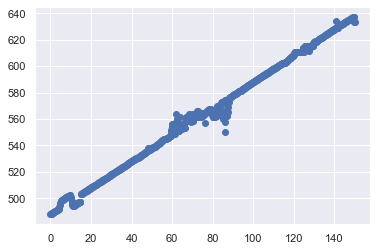

In [80]:
plt.scatter(x=df['TARGET_S'], y = df['SOURCE_S'])

<AxesSubplot:xlabel='TARGET_S', ylabel='SOURCE_S'>

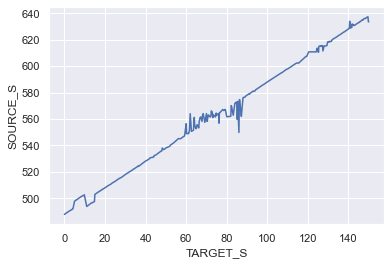

In [81]:
df['TIMESHIFT'] = df['SOURCE_S'].shift(1) - df['SOURCE_S']
sns.lineplot(data = df, x='TARGET_S', y='SOURCE_S')
# plt.plot(x=df['X'], y = df['Y'])
# sns.scatterplot()
# df['Y-1'] 
# sns.scatterplot(df['Y-1'])

<AxesSubplot:xlabel='TARGET_S', ylabel='ROLL_SOURCE_S'>

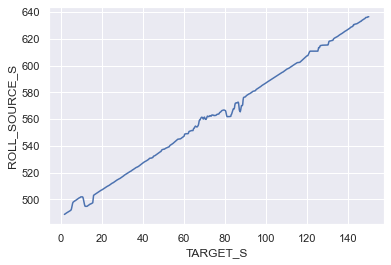

In [82]:
WINDOW_SIZE = 10
df['ROLL_SOURCE_S'] = df['SOURCE_S'].rolling(WINDOW_SIZE).median()
sns.lineplot(data = df, x = 'TARGET_S', y = 'ROLL_SOURCE_S')

Text(0.5, 0, 'Time of source video in seconds')

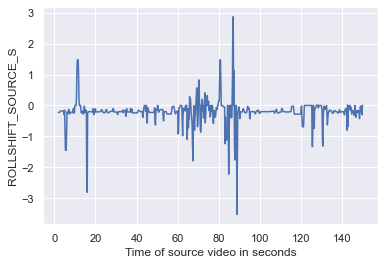

In [83]:
df['ROLLSHIFT_SOURCE_S'] = df['SOURCE_S'].rolling(WINDOW_SIZE).median().shift(1) - df['SOURCE_S'].rolling(WINDOW_SIZE).median()
sns.lineplot(data = df, x='TARGET_S', y='ROLLSHIFT_SOURCE_S')
plt.xlabel('Time of source video in seconds')